In [1]:
from ondepi.resources.lobster import dataparser as dp
from ondepi.visualisations import price_level as pl
from ondepi.visualisations import sample as sa

In [2]:
symbol = 'INTC'
date = '2019-01-31'
price_level = 466000
direction = 1
std_size = 200
t0 = 2.5e3
t1 = 5.25e3
reset_time_origin = True
time_range = (t0, t1) if not reset_time_origin else (0, t1-t0)

In [3]:
# Parse price level from LOBSTER
df = dp.parse_price_level(
    symbol=symbol, date=date,
    price_level=price_level,
    direction=direction,
    t0=t0, t1=t1,
    reset_time_origin=reset_time_origin
)

In [4]:
# Assemble dataframe of sample for stochastic model
df_s = dp.parse_df_sample(
    symbol=symbol, date=date,
    price_level=price_level,
    direction=direction,
    std_size=std_size,
    t0=t0, t1=t1,
    reset_time_origin=reset_time_origin
)

### Level in the lob grid

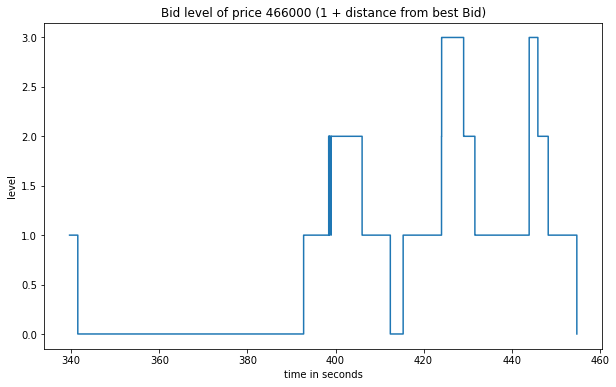

In [5]:
ax = pl.plot_level_evolution(df, time_range=time_range)

### Volumes in the price level queue

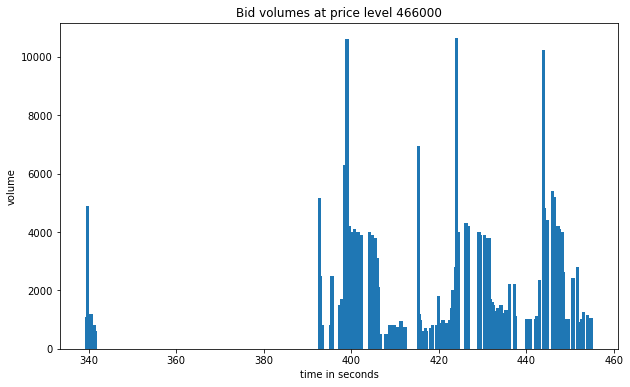

In [6]:
ax = pl.plot_level_volume(df, time_range=time_range)

### Reconstructed volume in the queue from parsed sample for stochastic model

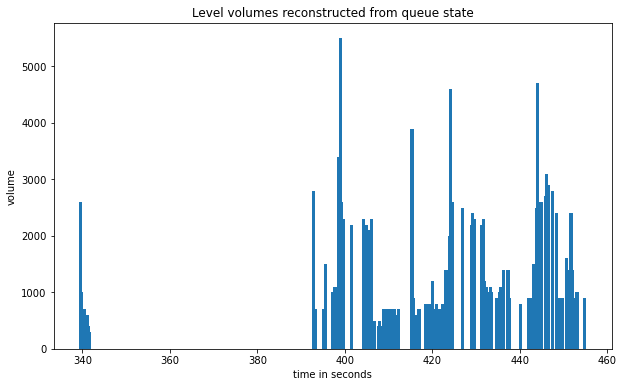

In [7]:
ax = sa.plot_reconstructed_volumes(df_s, time_range=time_range)

In [8]:
df

,time_i,event_label,time,level,size,price,direction,price_level,level_volume
0,339606695612,1,339.606696,1,100,466000,1,466000,100
1,339606698424,1,339.606698,1,100,466000,1,466000,200
2,339606727891,1,339.606728,1,200,466000,1,466000,400
3,339606729850,1,339.606730,1,100,466000,1,466000,500
4,339606731897,1,339.606732,1,400,466000,1,466000,900
...,...,...,...,...,...,...,...,...,...
892,453937177024,3,453.937177,1,100,466000,1,466000,1164
893,454754279603,3,454.754280,1,100,466000,1,466000,1064
894,454769773601,3,454.769774,1,100,466000,1,466000,964
895,454790004131,3,454.790004,1,200,466000,1,466000,764


In [9]:
df_s

,time_i,time,event,state,N_D,N_A
0,339606698424,339.606698,1,0,0,0
1,339606729850,339.606730,1,1,0,1
2,339606731897,339.606732,1,2,0,2
3,339606731898,339.606732,1,3,0,3
4,339606747782,339.606748,1,4,0,4
...,...,...,...,...,...,...
1492,454754279603,454.754280,0,9,748,757
1493,454769773601,454.769774,0,8,749,757
1494,454790004131,454.790004,0,7,750,757
1495,454790664074,454.790664,0,6,751,757
